<h1>Realce no Domínio Espacial</h1>

O realce de imagens no domínio espacial envolve a aplicação de um filtro (máscara) sobre a imagem original a fim de produzir uma imagem modificada. Esta técnica ajusta os valores dos pixels na imagem de acordo com um padrão definido pela máscara. Ao aplicar a convolução, cada pixel da imagem resultante é calculado como a soma ponderada dos pixels vizinhos na imagem original, com os pesos definidos pela máscara.

Inclusão dos pacotes.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

[Convolução](https://miro.medium.com/max/526/0*nHjlPyCcgSTo9iOm.gif)

1) Escreva uma função para realizar a convolução entre uma imagem qualquer e um kernel de 3x3, ambos passados como argumento da função:

In [3]:
def conv(img, mat: np.matrix, med):
  pady = int((mat.shape[0]-1)/2)
  padx = int((mat.shape[1]-1)/2)
  for x in range(padx, img.shape[0]-padx):
    for y in range(pady, img.shape[1]-pady):
      sum = img[x+1,y-1] * mat[2,0] + \
        img[x-1,y-1]     * mat[0,0] + \
        img[x,y-1]       * mat[1,0] + \
        img[x-1,y]       * mat[0,1] + \
        img[x,y]         * mat[1,1] + \
        img[x+1,y]       * mat[2,1] + \
        img[x,y+1]       * mat[1,2] + \
        img[x+1,y+1]     * mat[2,2] + \
        img[x-1,y+1]     * mat[0,2]

      img[x,y] = sum / med

def conv_movel(img, mat: np.matrix):
  conv(img, mat, mat.size)

def conv_gauss(img, mat: np.matrix):
  conv(img, mat, mat.sum())


2) Plote a imagem e o histograma da figura **ronchi.bmp**.

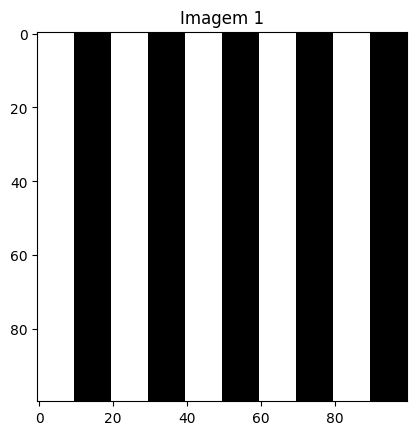

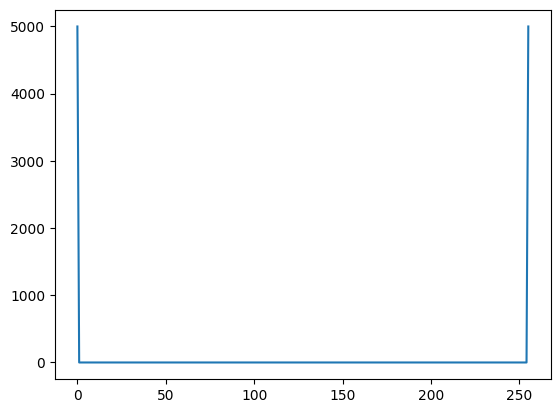

In [4]:
#Plotar a imgaem ronchi e mostrar o seu histograma
plt.title('Imagem 1')
img = cv2.imread('ronchi.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()


3) Plote a imagem e o histograma da figura **ronchi.bmp** realçada com a aplicação de um filtro da média móvel 3x3.

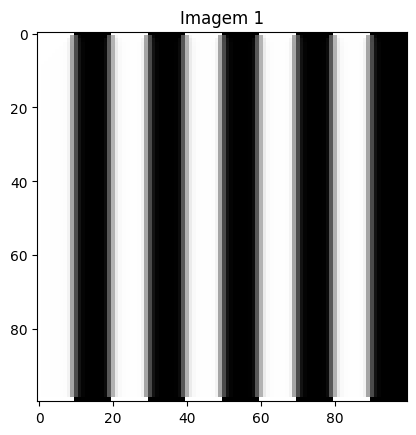

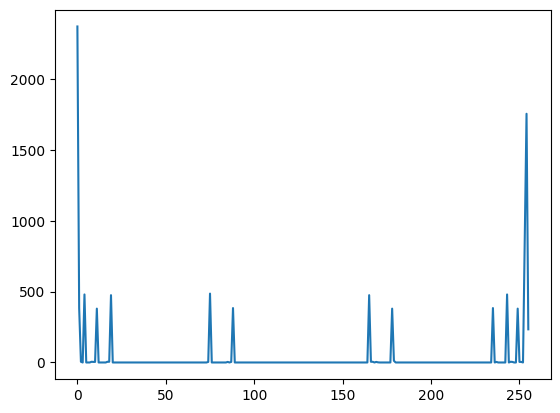

In [6]:
plt.title('Imagem 1')
img = cv2.imread('ronchi.bmp', cv2.IMREAD_GRAYSCALE)
conv_movel(img, np.matrix("1 1 1; 1 1 1; 1 1 1"))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

4) Plote a imagem e o histograma da figura **ronchi.bmp** realçada com a aplicação de um filtro Gaussiano ($\sigma=1$) 3x3.

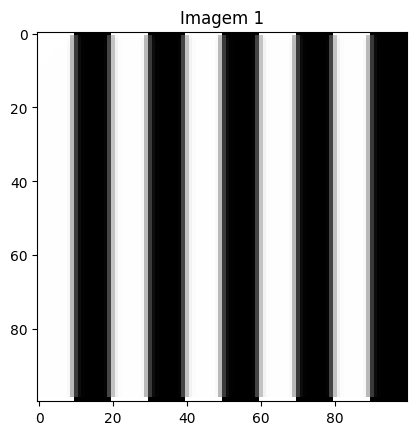

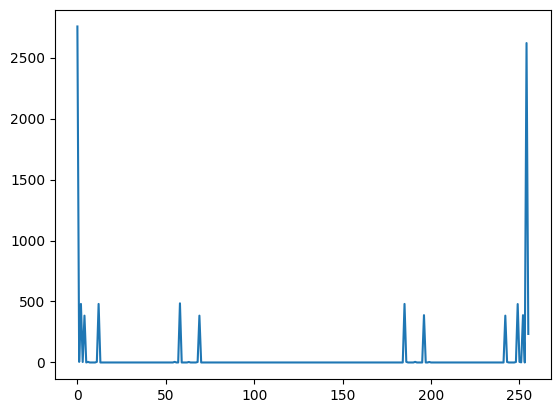

In [8]:
plt.title('Imagem 1')
img = cv2.imread('ronchi.bmp', cv2.IMREAD_GRAYSCALE)
conv_gauss(img, np.matrix("1 2 1; 2 4 2; 1 2 1"))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

5) Plote a imagem e o histograma da figura **ronchi_sp.bmp**.

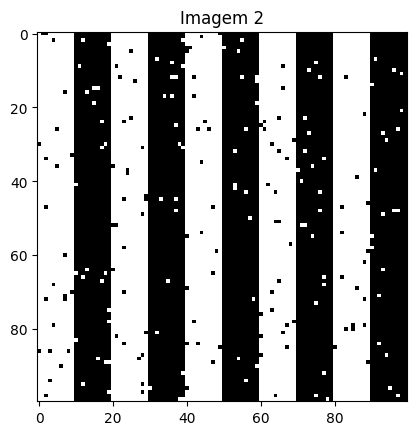

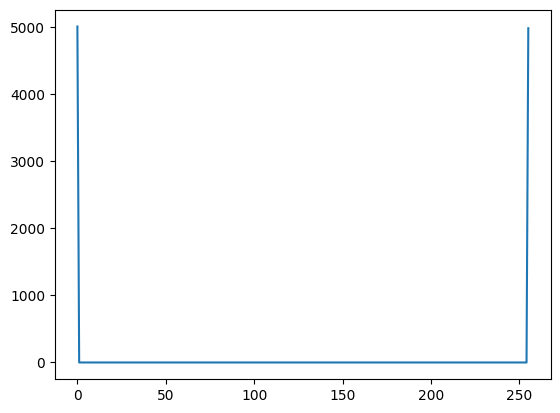

In [9]:
#Plotar a imgaem ronchi e mostrar o seu histograma

plt.title('Imagem 2')
img = cv2.imread('ronchi_sp.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
hist1 = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist1)
plt.show()

6) Plote a imagem e o histograma da figura **ronchi_sp.bmp** realçada com a aplicação de um filtro da média móvel 3x3.

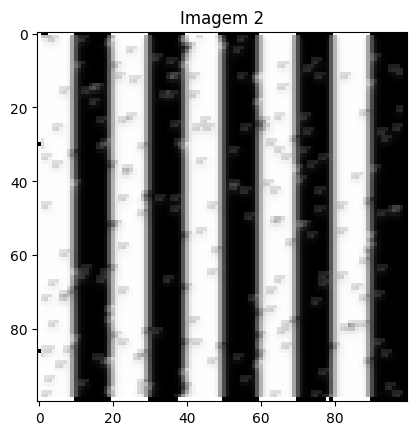

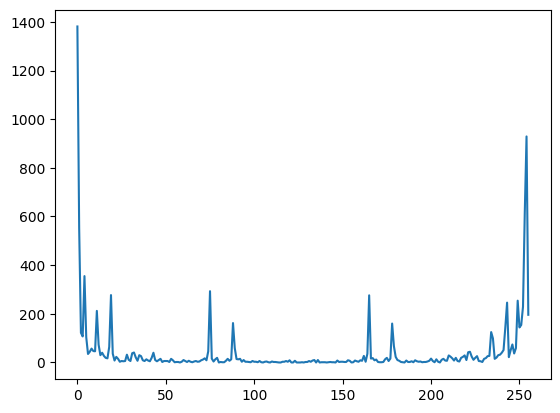

In [10]:
plt.title('Imagem 2')
img = cv2.imread('ronchi_sp.bmp', cv2.IMREAD_GRAYSCALE)
conv_movel(img, np.matrix("1 1 1; 1 1 1; 1 1 1"))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
hist1 = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist1)
plt.show()

7) Plote a imagem e o histograma da figura **ronchi_sp.bmp** realçada com a aplicação de um filtro Gaussiano ($\sigma=1$) 3x3.

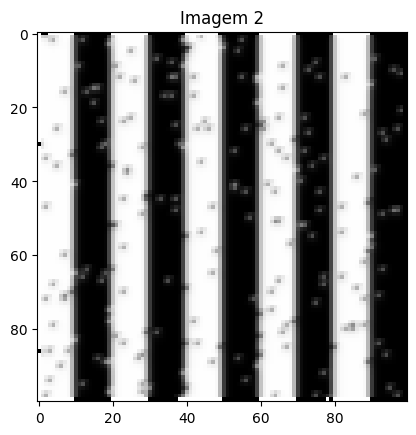

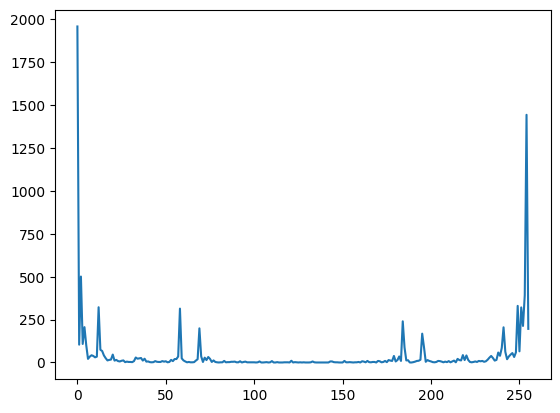

In [11]:
plt.title('Imagem 2')
img = cv2.imread('ronchi_sp.bmp', cv2.IMREAD_GRAYSCALE)
conv_gauss(img, np.matrix("1 2 1; 2 4 2; 1 2 1"))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
hist1 = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist1)
plt.show()

8) Utilizando a função **filter2D()** da OpenCV, aplique e compare os resultados do realce com filtros de Média Móvel 3x3, 5x5, 7x7 e 9x9, aplicados na imagem da figura **ronchi_sp.bmp**.

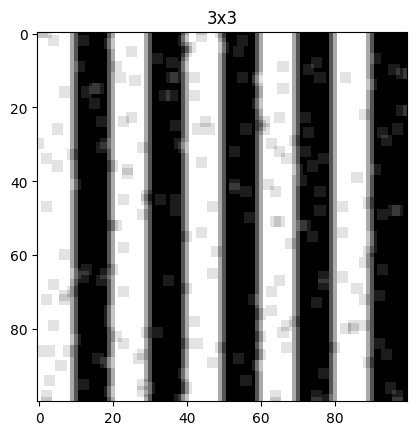

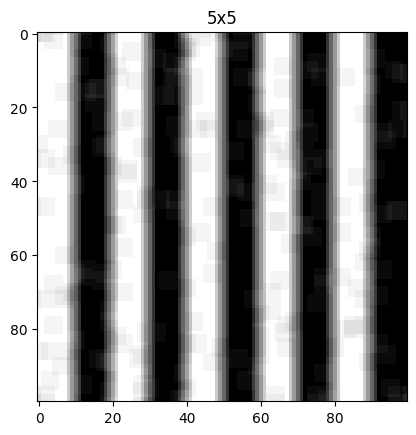

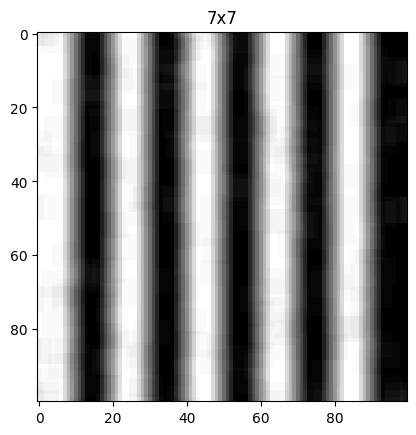

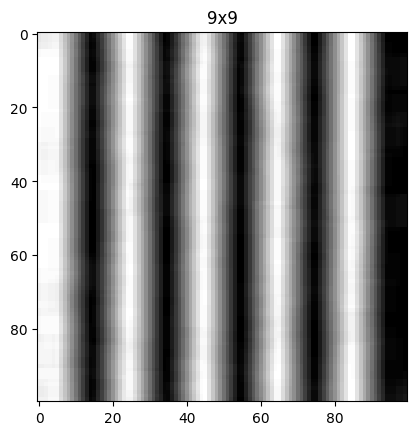

In [13]:
plt.title('')
img = cv2.imread('ronchi_sp.bmp', cv2.IMREAD_GRAYSCALE)

img1 = cv2.filter2D(src=img, ddepth=-1, kernel=np.matrix("1 1 1; 1 1 1; 1 1 1")/9)
img2 = cv2.filter2D(src=img, ddepth=-1, kernel=np.matrix("1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1")/25)
img3 = cv2.filter2D(src=img, ddepth=-1, kernel=np.matrix("""
1 1 1 1 1 1 1;
1 1 1 1 1 1 1;
1 1 1 1 1 1 1;
1 1 1 1 1 1 1;
1 1 1 1 1 1 1;
1 1 1 1 1 1 1;
1 1 1 1 1 1 1""")/49)
img4 = cv2.filter2D(src=img, ddepth=-1, kernel=np.matrix("""
1 1 1 1 1 1 1 1 1;
1 1 1 1 1 1 1 1 1;
1 1 1 1 1 1 1 1 1;
1 1 1 1 1 1 1 1 1;
1 1 1 1 1 1 1 1 1;
1 1 1 1 1 1 1 1 1;
1 1 1 1 1 1 1 1 1;
1 1 1 1 1 1 1 1 1;
1 1 1 1 1 1 1 1 1""")/81)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('3x3')
plt.show()

plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('5x5')
plt.show()

plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title('7x7')
plt.show()

plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.title('9x9')
plt.show()


9) Utilizando a função **medianBlur()** da OpenCV, aplique e compare os resultados do realce com filtros da Mediana de ordem 3, 5, 7 e 9, aplicados na imagem da figura **ronchi_sp.bmp**.

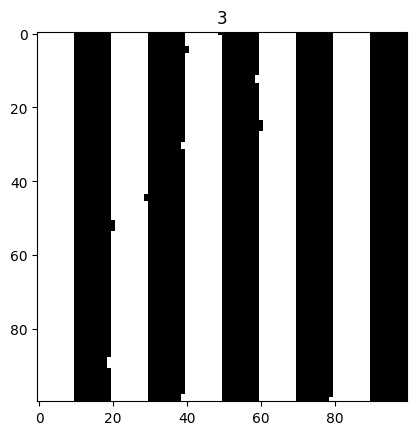

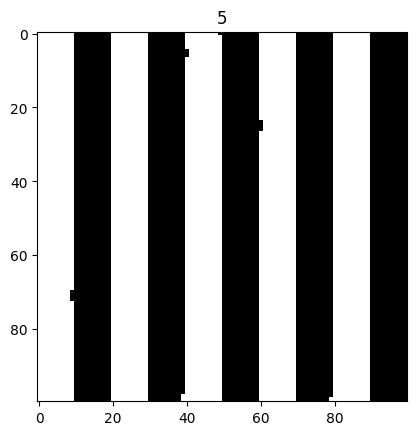

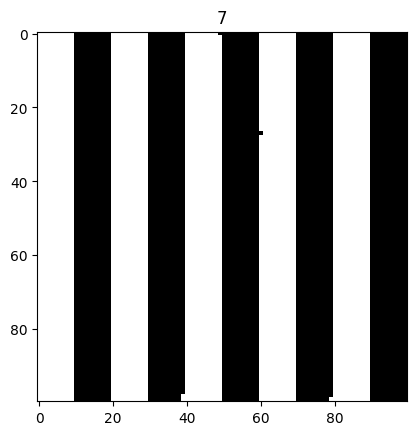

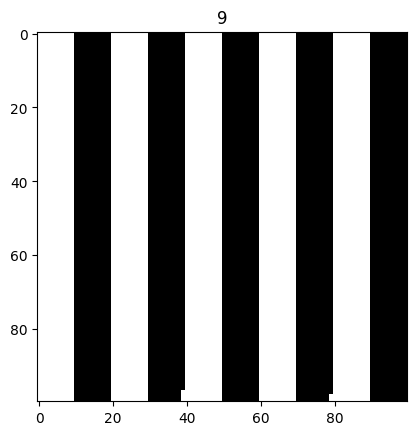

In [16]:
plt.title('')
img = cv2.imread('ronchi_sp.bmp', cv2.IMREAD_GRAYSCALE)

img1 = cv2.medianBlur(img, 3)
img2 = cv2.medianBlur(img, 5)
img3 = cv2.medianBlur(img, 7)
img4 = cv2.medianBlur(img, 9)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('3')
plt.show()

plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('5')
plt.show()

plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title('7')
plt.show()

plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.title('9')
plt.show()

---

<h1>Equipe</h1>

**Aluno 1**: Lucas Guimaraes Moreira (26681307)

**Aluno 2**: Bruno Dalagnol (25766201)

**Aluno 3**: Renato Leal de Araujo (26723573)

